Test shape: (7178, 48, 48, 1)
Classes: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
225/225 [==============================] - 25s 103ms/step

Classification Report:

              precision    recall  f1-score   support

       angry       0.47      0.51      0.49       958
     disgust       0.41      0.70      0.52       111
        fear       0.45      0.24      0.31      1024
       happy       0.80      0.77      0.78      1774
     neutral       0.52      0.58      0.55      1233
         sad       0.44      0.48      0.46      1247
    surprise       0.68      0.77      0.72       831

    accuracy                           0.58      7178
   macro avg       0.54      0.58      0.55      7178
weighted avg       0.57      0.58      0.57      7178



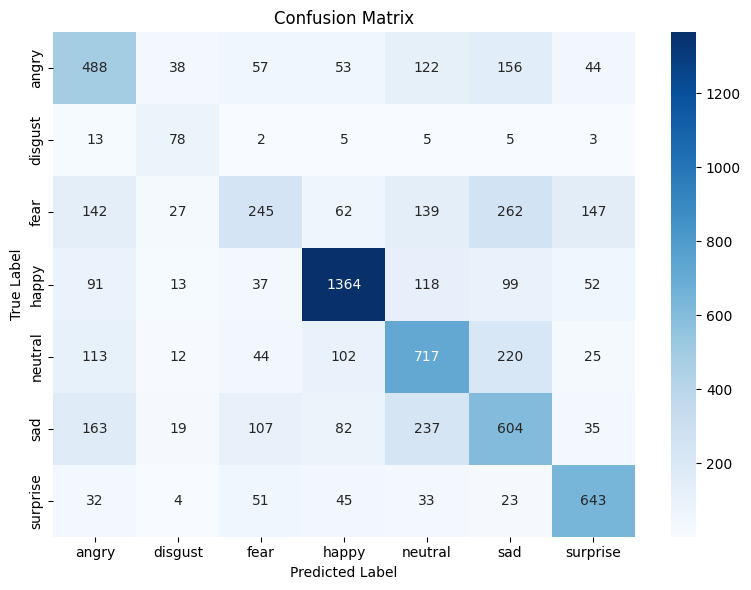

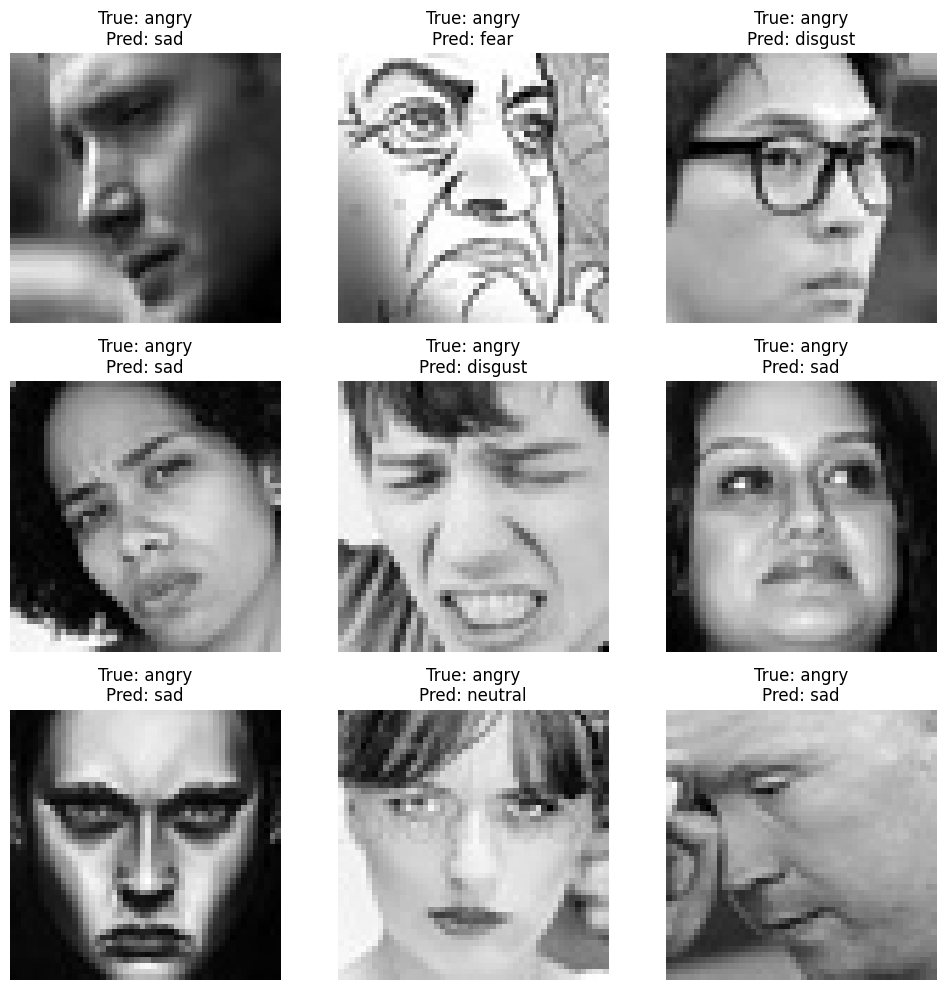

In [3]:
# ---------------------------------------------
# Facial Expression Recognition - Evaluation
# Notebook 3: Evaluate Model on Test Set
# ---------------------------------------------

# 1. Imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pickle

# 2. Load test data and class labels
X_test = np.load('../data/X_test.npy')
y_test = np.load('../data/y_test.npy')  # One-hot encoded

with open('../data/class_names.pkl', 'rb') as f:
    class_names = pickle.load(f)

print("Test shape:", X_test.shape)
print("Classes:", class_names)

# 3. Load the trained model
model = tf.keras.models.load_model('../models/expression_model_20250509-093652.h5')

# 4. Predict
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# 5. Classification Report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

# 6. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# 7. (Optional) Visualize some incorrect predictions
def plot_misclassified(X, y_true, y_pred, class_names, max_images=9):
    misclassified_indices = np.where(y_true != y_pred)[0]
    if len(misclassified_indices) == 0:
        print("No misclassifications found!")
        return
    plt.figure(figsize=(10, 10))
    for i, idx in enumerate(misclassified_indices[:max_images]):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(X[idx].squeeze(), cmap='gray')
        plt.title(f"True: {class_names[y_true[idx]]}\nPred: {class_names[y_pred[idx]]}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

plot_misclassified(X_test, y_true, y_pred, class_names)